In [2]:
from carto import city
from carto import area
from carto import tools

from enum import IntEnum
from shapely.geometry import mapping, Polygon, Point, LineString, MultiPolygon
from shapely import ops
import shapely
import numpy as np
import geopandas as gpd
import json
import matplotlib.pylab as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import math

%matplotlib inline

surface = 200000
l = 447
6


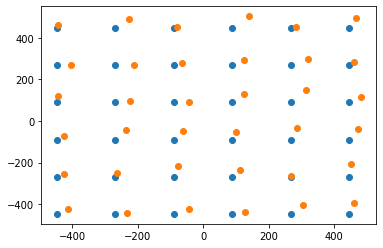

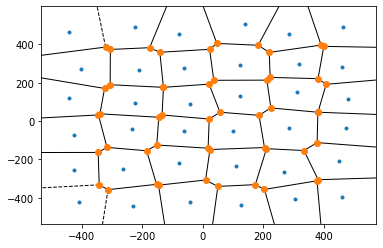

In [77]:
density = 10000
population = 2_000_000
surface = (population // density) * 1000

l = int(math.sqrt(surface))

print(f"surface = {surface}")
print(f"l = {l}")

N =  int(l) // 60 - 1
print(N)
radius = N

points = np.array([[x,y] for x in np.linspace(-l,l,N) for y in np.linspace(-l,l,N)])

plt.scatter(points[:,0], points[:,1])

points += np.random.random((len(points), 2)) * (radius * 10)
plt.scatter(points[:,0], points[:,1])
vor = Voronoi(points)
voronoi_plot_2d(vor);

In [72]:
regions = [r for r in vor.regions if -1 not in r and len(r) > 0]
regions = [Polygon([vor.vertices[i] for i in r]) for r in regions]

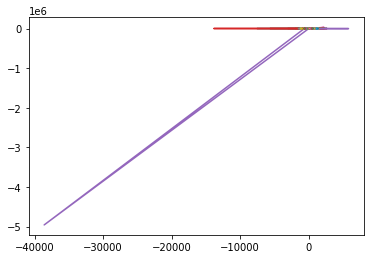

In [73]:
for r in regions:
    plt.plot(*r.exterior.xy)

In [74]:
zone = Polygon((2 * np.random.random((8,2)) - 1) * radius).convex_hull.buffer(radius * 65)
#zone = Polygon([(0,0), (1,-3), (2, 3)]).buffer(width/2)
regions = [r for r in regions if zone.contains(r) ]

total surface = 5666828.289181718


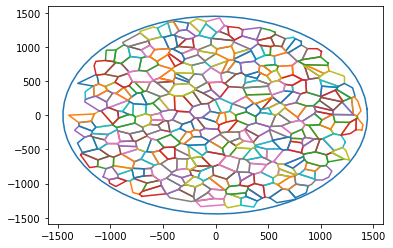

In [75]:
plt.plot(*zone.exterior.xy)
for r in regions:
    plt.plot(*r.exterior.xy)
area = sum([r.area for r in regions])
print(f"total surface = {area}")

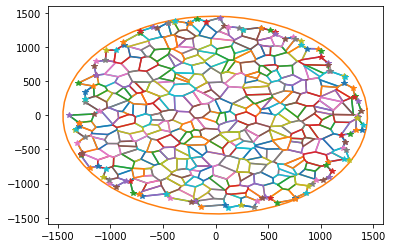

In [76]:
walls = MultiPolygon(regions).buffer(0.1, join_style=2) # 100 mètres entre les quartiers et les murs
plt.plot(*walls.exterior.xy)
plt.plot(*zone.exterior.xy)
for r in regions:
    plt.plot(*r.exterior.xy)
for tower in np.array(walls.exterior):
    plt.plot(*tower, '*')